## Import modules

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Hyper Parameter

In [37]:
EPOCHS = 100

## Define Network Structure

In [41]:
def MyModel():
    feat = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                            include_top=False) # 뒤쪽의 fully connected layer는 제외하고, convolution layer만 가져옴
    feat.trainable = False  # 가져온 network 부분은 학습이 이루어지지 않게 조작
    
    seq = tf.keras.models.Sequential()
    seq.add(feat)  # h x w x c
    seq.add(tf.keras.layers.GlobalAveragePooling2D())  # pooling을 통해 c만 남김
    seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # binary classification을 위한 layer

    return seq

## Load DataSet(Cats vs Dogs)

In [35]:
(train_ds, test_ds), meta = tfds.load(
    name="cats_vs_dogs", 
    with_info=True,  # 데이터 meta 정보 가져옴
    split=('train[:80%]', 'train[80%:]'),  # 8:2로 데이터셋 분할
    as_supervised=True)  # Label을 함께 가져옴

### Check Data

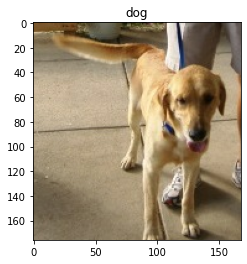

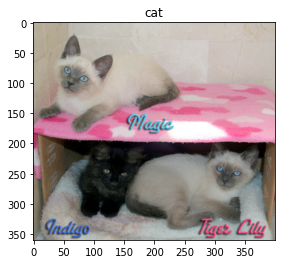

In [36]:
l2s = meta.features['label'].int2str   # label을 string으로 바꿔주는 함수
for img, label in test_ds.take(2):
    plt.figure()
    plt.imshow(img)  # img를 그리고
    plt.title(l2s(label))  # label을 string 형태로 받아서 제목으로 표시

-> 데이터 크기가 다름, normalization이 되어있지 않음

## Data PreProcessing

In [39]:
def preprocess(img, label):
    img = tf.cast(img, tf.float32) / 255.0  # 0~1 사이로 캐스팅 (normalize)
    img = tf.image.resize(img, (224, 224))  # 이미지의 크기를 맞춤
    return img, label

train_ds = train_ds.map(preprocess).batch(32).prefetch(1024)
test_ds = test_ds.map(preprocess).batch(32).prefetch(1024)

## Model Creation

In [42]:
model = MyModel()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training

In [ ]:
model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)